Looking at LD on the X, especially the possible PAR2

In [1]:
%run ../scripts/notebook_settings.py

In [2]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
gt_zarr = allel.GenotypeArray(callset["calldata/GT"])

Picking a specific region
PAR2: 141472365-141608462

In [17]:
pos = allel.SortedIndex(callset["variants/POS"])
loc_region = pos.locate_range(141472365, 141570255)
gt_region = allel.GenotypeArray(gt_zarr[loc_region])

Transforming GT data

In [18]:
IDs = meta_data_samples.loc[(meta_data_samples.Sex == "F")].callset_index.values
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [2, 2, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

In [19]:
def plot_ld(gn, title):
    m = allel.rogers_huff_r(gn) ** 2
    ax = allel.plot_pairwise_ld(m)
    ax.set_title(title)

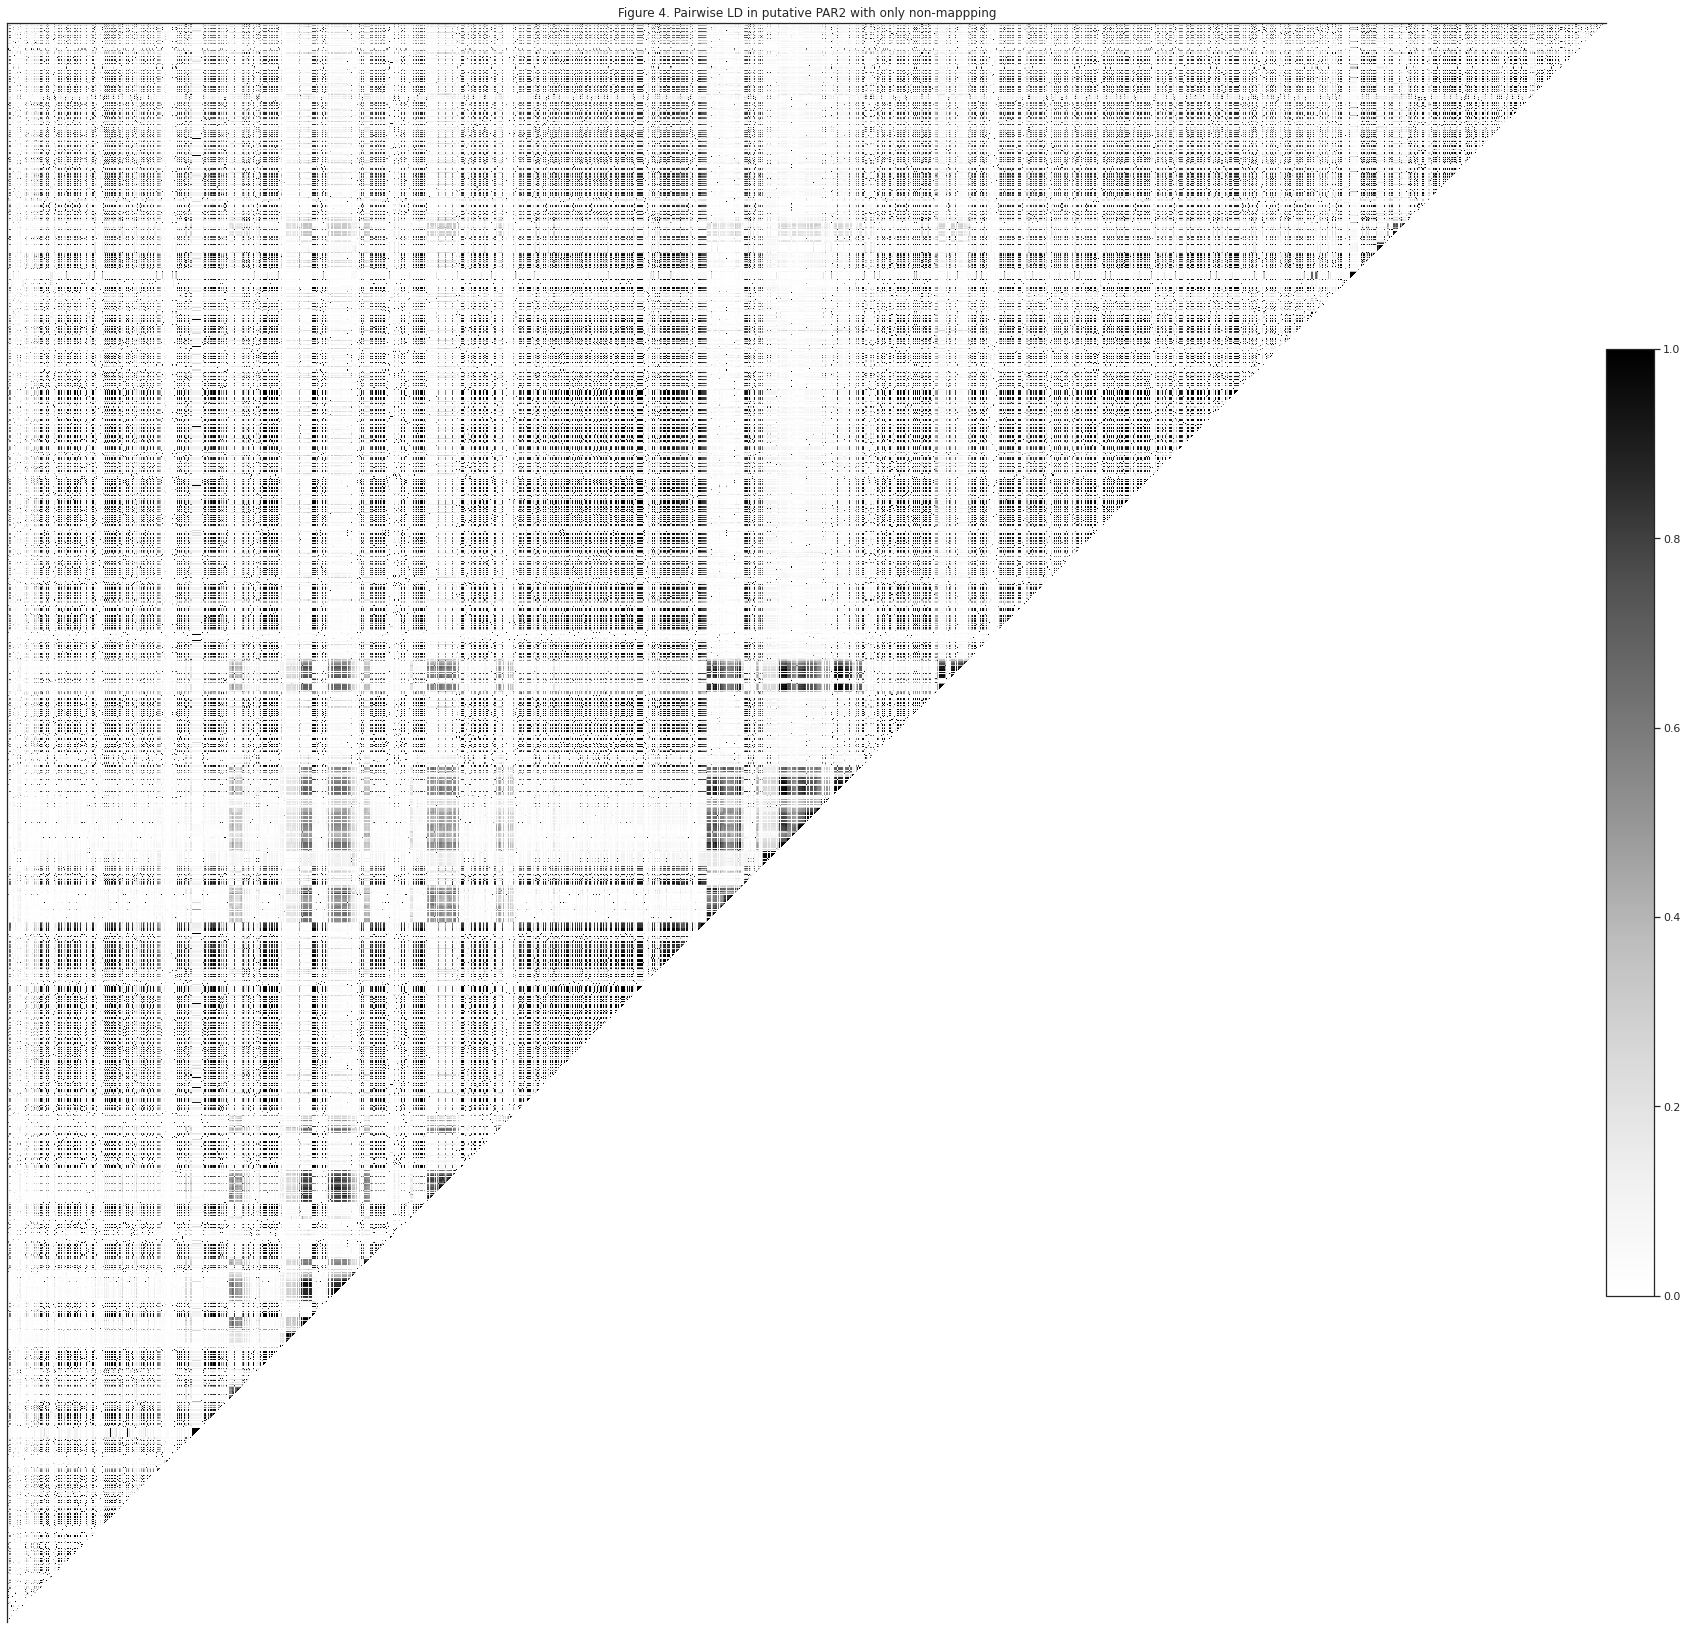

In [20]:
plot_ld(gn[:], 'Figure 4. Pairwise LD in putative PAR2 with only non-mappping') 

In [7]:
pos = allel.SortedIndex(callset["variants/POS"])
loc_region = pos.locate_range(101472000, 101609000)
gt_region = allel.GenotypeArray(gt_zarr[loc_region])

In [8]:
IDs = meta_data_samples.loc[(meta_data_samples.Sex == "F")].callset_index.values
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [2, 2, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]], dtype=int8)

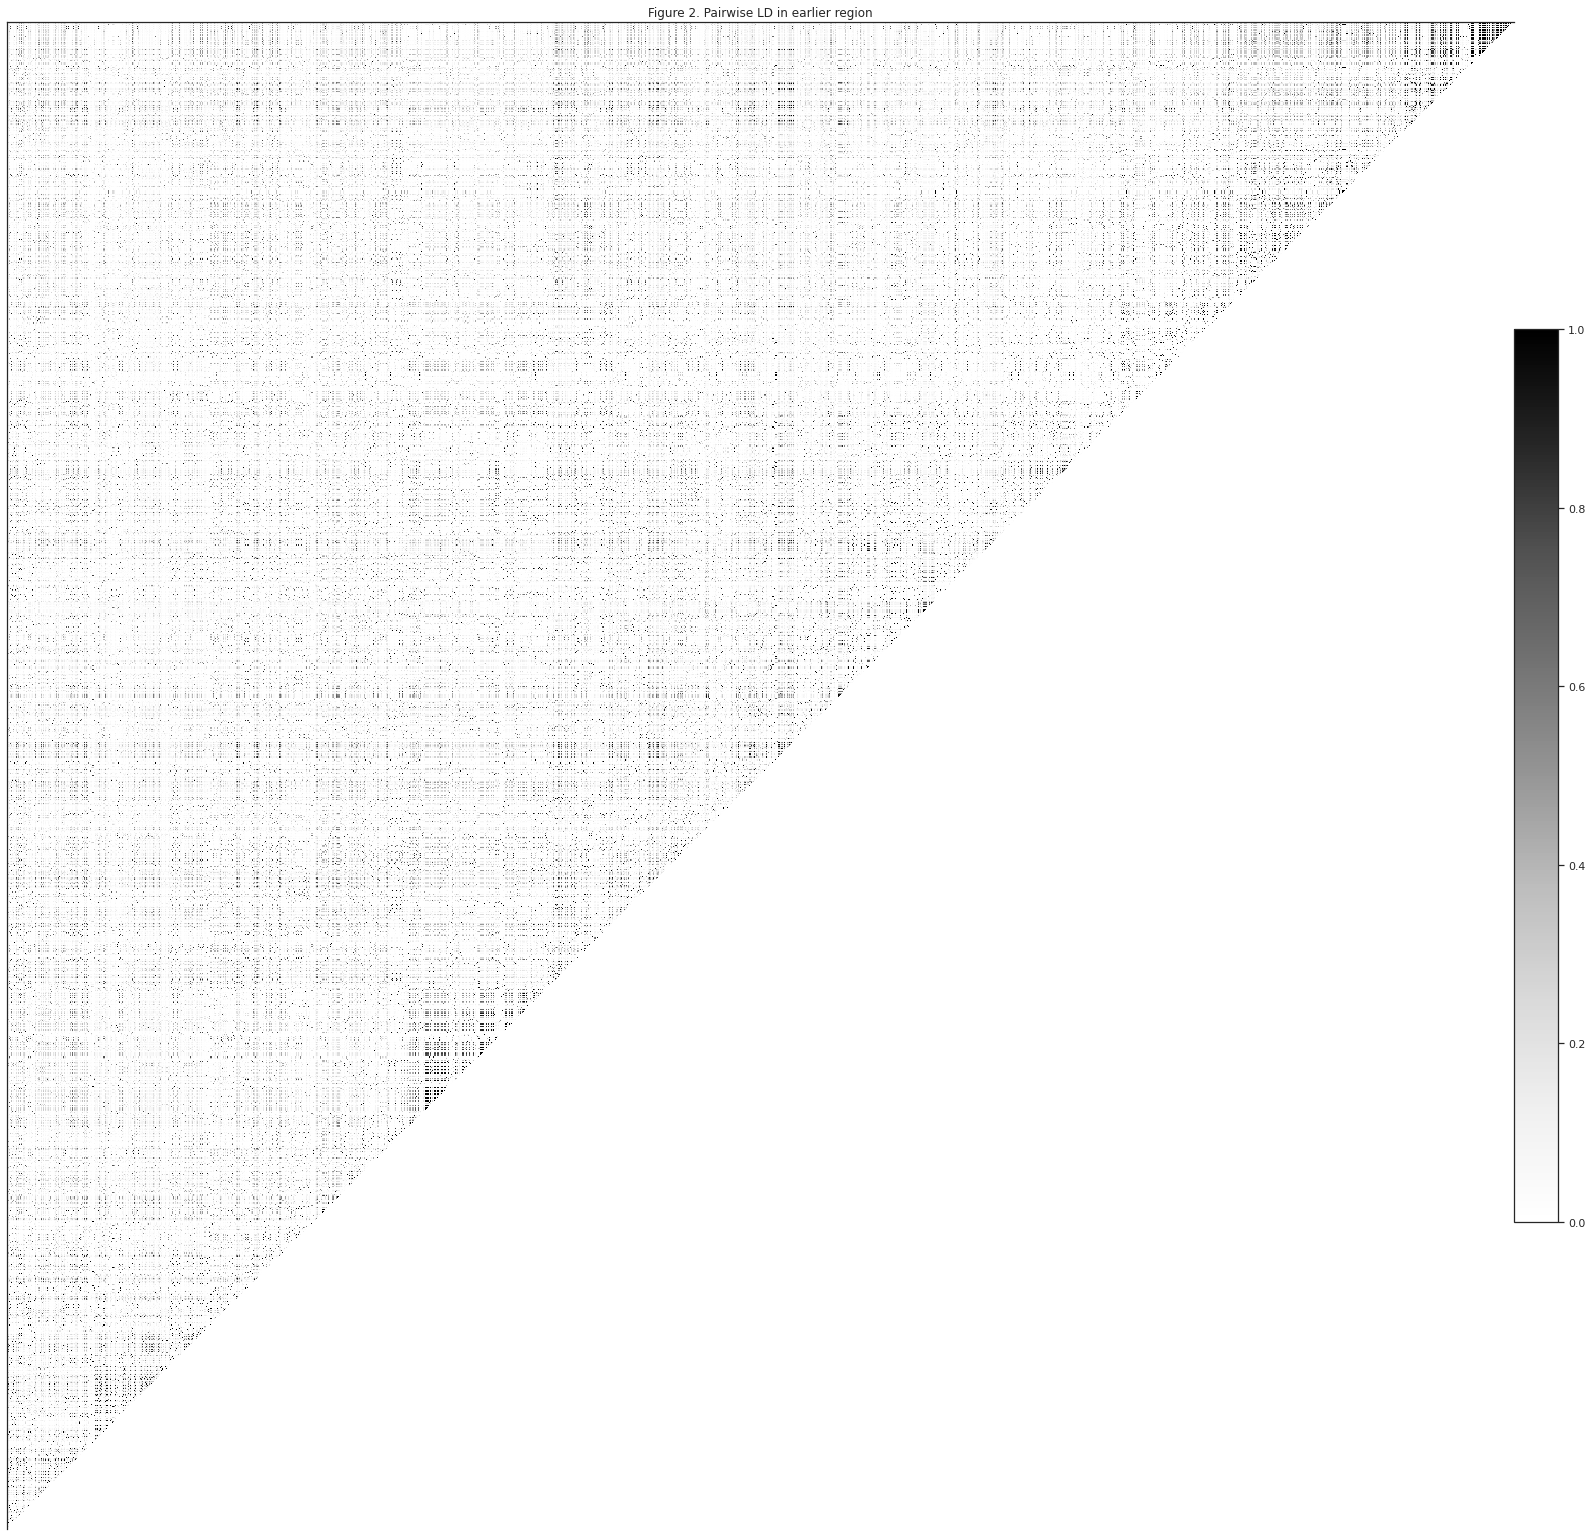

In [9]:
plot_ld(gn[:], 'Figure 2. Pairwise LD in earlier region') 

In [10]:
pos = allel.SortedIndex(callset["variants/POS"])
loc_region = pos.locate_range(800000, 1000000)
gt_region = allel.GenotypeArray(gt_zarr[loc_region])

In [11]:
IDs = meta_data_samples.loc[(meta_data_samples.Sex == "F")].callset_index.values
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

array([[2, 2, 2, ..., 2, 2, 2],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int8)

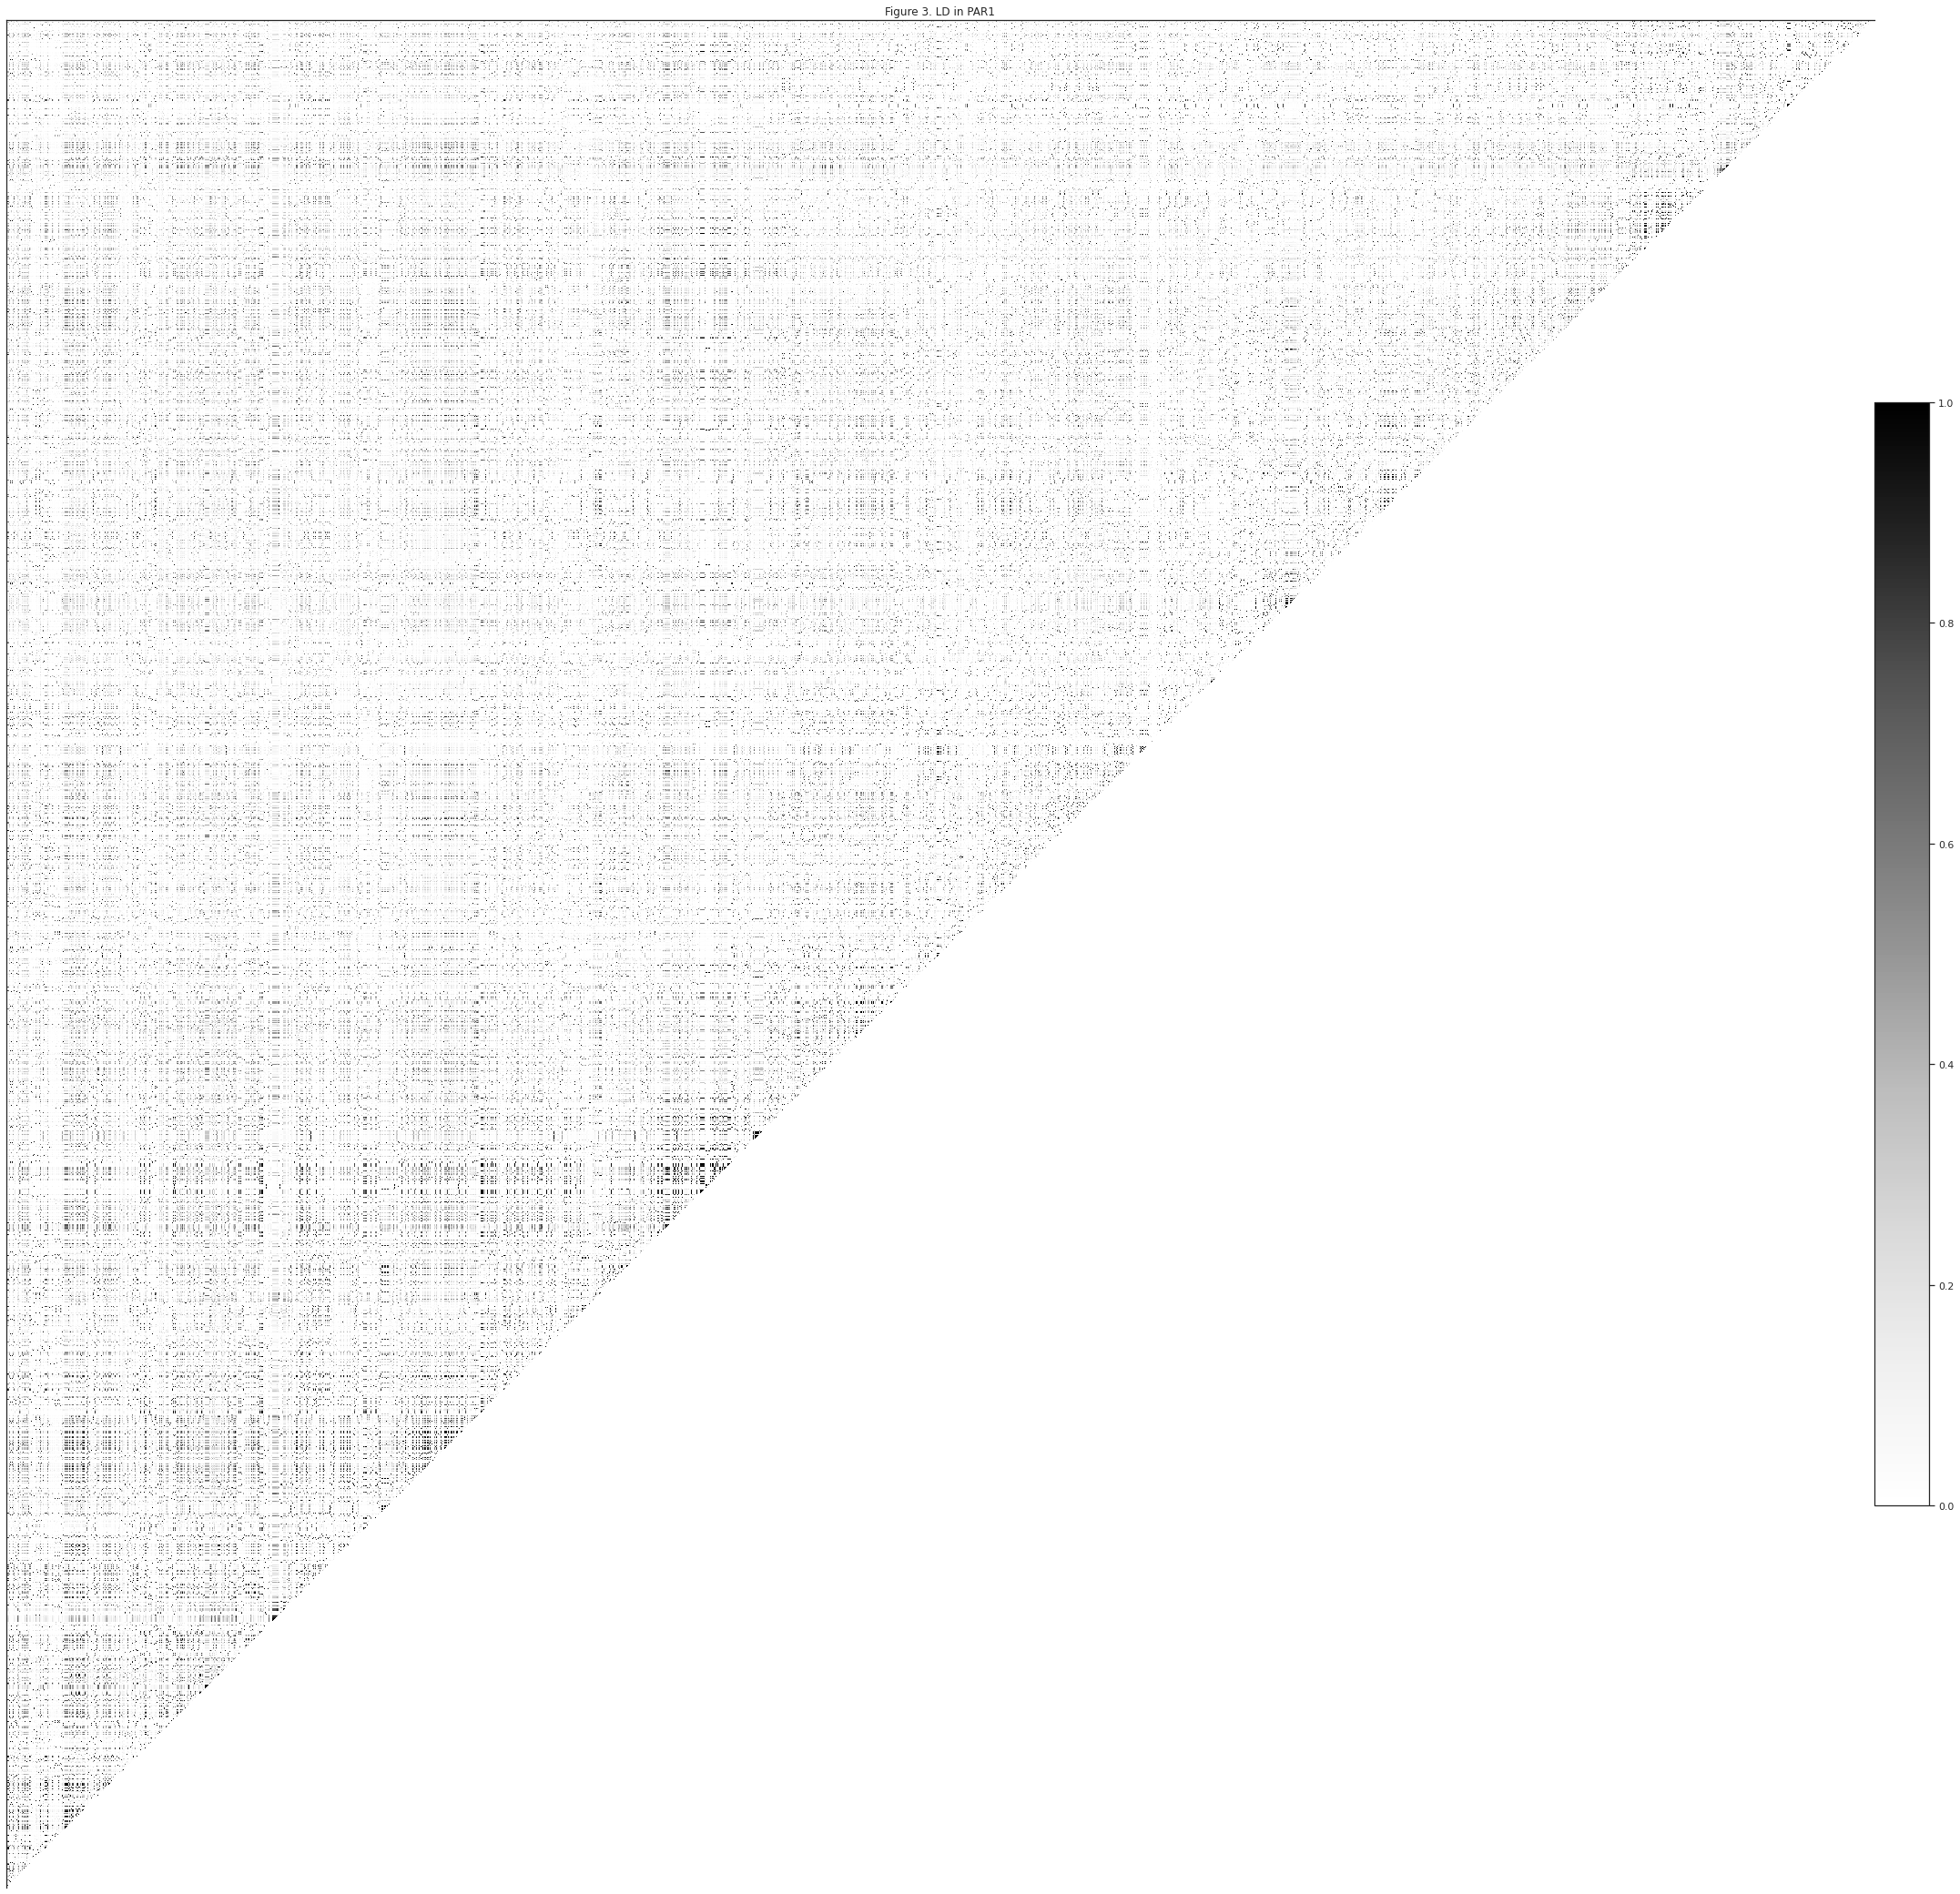

In [12]:
plot_ld(gn[:], 'Figure 3. LD in PAR1') 

In [15]:
pos = allel.SortedIndex(callset["variants/POS"])
loc_region = pos.locate_range(113703, 153703)
gt_region = allel.GenotypeArray(gt_zarr[loc_region])
IDs = meta_data_samples.loc[(meta_data_samples.Sex == "F")].callset_index.values
gt = gt_region.take(IDs, axis=1)
ac = gt.count_alleles()[:]
np.count_nonzero(ac.max_allele() > 1)
flt = (ac.max_allele() == 1) & (ac[:, :2].min(axis=1) > 1)
gf = gt.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int8)

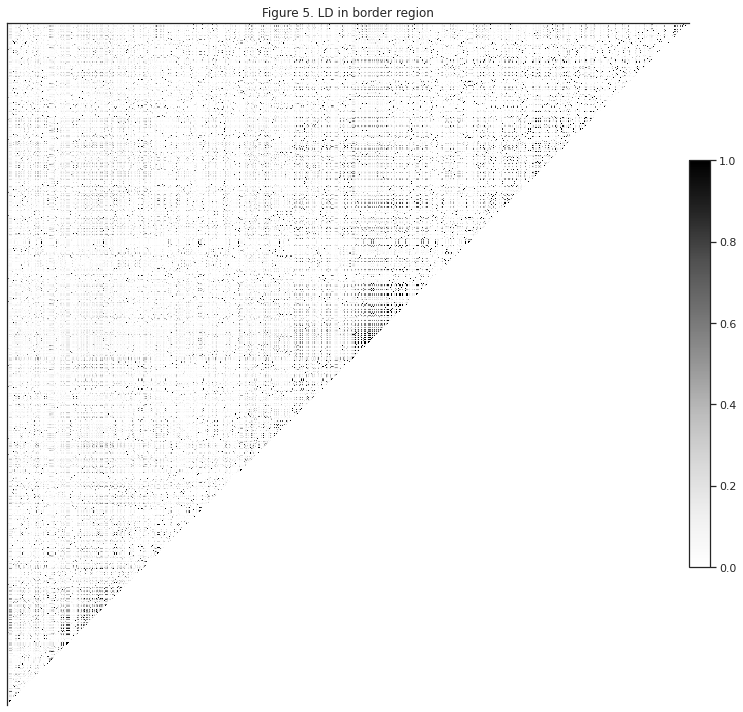

In [16]:
plot_ld(gn[:], 'Figure 5. LD in border region') 